In [1]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
%matplotlib inline

First references:

 - https://xkcd.com/1132/
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
 - https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f
 - https://www.wolframalpha.com/input/?i=diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+x)
 - https://www.wolframalpha.com/input/?i=diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+m)
 - https://www.wolframalpha.com/input/?i=diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+s)
 - https://www.wolframalpha.com/input/?i=diff(diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+m),+m)
 - https://www.wolframalpha.com/input/?i=diff(diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+s),+m)
 - https://www.wolframalpha.com/input/?i=diff(diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+m),+s)
 - https://www.wolframalpha.com/input/?i=diff(diff(log(1%2Fsrqt(2*pi*s%5E2))-(x-m)%5E2%2F(2*s%5E2),+s),+s)
 - https://www.wolframalpha.com/input/?i=det(%7B%7B-1%2Fs%5E2-x,-2*b%2Fs%5E3%7D,%7B-2*b%2Fs%5E3,-1%2Fs%5E2-x%7D%7D)%3D0
 - https://stackoverflow.com/questions/16739065/how-to-display-progress-of-scipy-optimize-function
 
Second references:

 - https://www.wolframalpha.com/input/?i=simplify(-log(1%2Fsrqt(2*pi*s%5E2)*exp(-(x-m)%5E2%2F(2*s%5E2))))
 - https://www.wolframalpha.com/input/?i=(1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2)
 - https://www.wolframalpha.com/input/?i=diff((1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2),m)
 - https://www.wolframalpha.com/input/?i=diff((1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2),s)
 - https://www.wolframalpha.com/input/?i=diff(diff((1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2),m),m)
 - https://www.wolframalpha.com/input/?i=diff(diff((1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2),m),s)
 - https://www.wolframalpha.com/input/?i=diff(diff((1%2F2)*log(2*pi)+%2B+log(s)+%2B+(x-m)%5E2%2F(2*s%5E2),s),s)
 - https://www.wolframalpha.com/input/?i=det(%7B%7B1%2Fs%5E2-x,2*b%2Fs%5E3%7D,%7B2*b%2Fs%5E3,2%2Fs%5E2-x%7D%7D)%3D0
 - https://www.wolframalpha.com/input/?i=3*s%5E4+-+s%5E3*sqrt(16*b%5E2+%2B+s%5E2)+%3C+0

$$\mathcal{L}(\theta \mid x) = f_\theta (x),$$

$$\mathcal{L} (\mu, \sigma \mid x) = \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

$$f(\mu, \sigma \mid x) = -\ln \mathcal{L} (\mu, \sigma \mid x) = \frac{1}{2}\ln(2\pi) + \ln(\sigma) +\frac{(x-\mu)^2}{2\sigma^2}$$

$$
\mathbf{J}_f = \left[
\begin{matrix}
     -\frac{x-\mu}{\sigma^2}\\
     -\frac{(x-\mu)^2 - \sigma^2}{\sigma^3}
\end{matrix}
\right]
$$

$$
\mathbf{H} = \left[
\begin{matrix}
     \frac{1}{\sigma^2} & \frac{2(x - \mu)}{\sigma^3} \\
     \frac{2(x - \mu)}{\sigma^3} & \frac{3(x - \mu)^2 - \sigma^2}{\sigma^4} 
\end{matrix}
\right]
$$

$$
\mathbf{A} = \frac{1}{N}\sum\limits_{i=1}^{N}\mathbf{H} = \left[
\begin{matrix}
     \frac{1}{\sigma^2} &  \frac{2(\bar{x} - \mu)}{\sigma^3} \\
     \frac{2(\bar{x} - \mu)}{\sigma^3} & \frac{3V_\mu - \sigma^2}{\sigma^4} 
\end{matrix}
\right]
=
\left[
\begin{matrix}
     \frac{1}{\sigma^2} & \frac{2\mathrm{Bias}(\bar{x})}{\sigma^3} \\
     \frac{2\mathrm{Bias}(\bar{x})}{\sigma^3} & \frac{2}{\sigma^2} 
\end{matrix}
\right]
$$

$$
\begin{align}
\det\left(\mathbf{A} - \mathbf{I}\lambda\right) = 0 \Leftrightarrow &
\frac{ \sigma^6\lambda^2 + 3\sigma^4\lambda + 4\mathrm{Bias}(\bar{x}) - 2\sigma^2 }{\sigma^6} = 0 \\
\Leftrightarrow & \lambda = \frac{3\sigma^4 \pm \sigma^3\sqrt{16 \mathrm{Bias}(\bar{x})^2 + \sigma^2}}{2\sigma^6}
\end{align}
$$

$$
\begin{align}
3\sigma^4 - \sigma^3\sqrt{16 \mathrm{Bias}(\bar{x})^2 + \sigma^2} < 0 \Leftrightarrow &
9\sigma^2 < 16 \mathrm{Bias}(\bar{x})^2 + \sigma^2 \\
\Leftrightarrow & \left|\mathrm{Bias}(\bar{x})\right| > \frac{\sqrt{2}}{2}\sigma
\end{align}
$$

$$
\mathbf{A} = \frac{1}{N}\sum\limits_{i=1}^{N}\mathbf{H} = \left[
\begin{matrix}
     \frac{1}{\sigma^2} &  \frac{2(\bar{x} - \mu)}{\sigma^3} \\
     \frac{2(\bar{x} - \mu)}{\sigma^3} & \frac{\frac{3}{N}\sum\limits_{i=1}^{N}(x-\mu)^2 - \sigma^2}{\sigma^4} 
\end{matrix}
\right]
$$

$$
\begin{align}
\det(\mathbf{A}) \geq 0 \Leftrightarrow & \frac{3}{N}\sum\limits_{i=1}^{N}(x-\mu)^2 - \sigma^2 - 4(\bar{x} - \mu)^2  \geq 0 \\
\operatorname{tr}(\mathbf{A}) \geq 0 \Leftrightarrow & \frac{3}{N}\sum\limits_{i=1}^{N}(x-\mu)^2 \geq 0
\end{align}
$$

$$
4\left[\frac{1}{N}\sum\limits_{i=1}^{N}x^2 - \bar{x}^2\right] - \frac{1}{N}\sum\limits_{i=1}^{N}x^2 + 2\bar{x}\mu - \mu^2 -\sigma^2 \geq 0
$$

$$
\bar{x}\mu \sim \pm\mu^2
$$

$$
\sigma^2 \sim \frac{N}{N-1}V_x
$$

$$
\sigma^2 \left[4\frac{N-1}{N} - 1\right] - \frac{1}{N}\sum\limits_{i=1}^{N}x^2 + 2\bar{x}\mu - \mu^2 \geq 0
$$

$$
3\sigma^2 - \frac{1}{N}\sum\limits_{i=1}^{N}x^2 + \mu^2 \geq 0
$$

$$
2\sigma^2 + \mu^2 \geq 0
$$

In [2]:
np.random.seed(123456)

In [3]:
N = 1000

In [4]:
beta = (2, 3)
X = stats.norm(*beta)

In [5]:
x = np.linspace(-10, 15, 1000)

In [6]:
xs = X.rvs(N)

In [7]:
xmu = np.mean(xs)
xsigma = np.std(xs)
print(xmu, xsigma)

1.8618672627061972 3.130692231902425


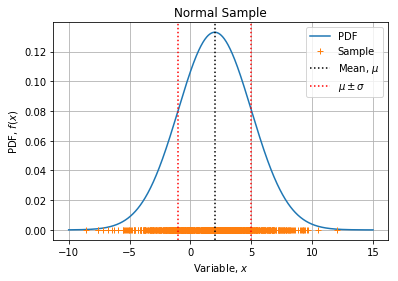

In [8]:
fig, axe = plt.subplots()
axe.plot(x, X.pdf(x), label="PDF")
axe.plot(xs, np.zeros(xs.size), '+', label="Sample")
axe.axvline(2, linestyle=':', color='k', label=r"Mean, $\mu$")
axe.axvline(2-3, linestyle=':', color='r', label=r"$\mu\pm\sigma$")
axe.axvline(2+3, linestyle=':', color='r')
axe.set_title("Normal Sample")
axe.set_xlabel(r"Variable, $x$")
axe.set_ylabel(r"PDF, $f(x)$")
axe.legend()
axe.grid()
fig.savefig("MLE_NLL_Sample.png", dpi=120)

In [9]:
def nLL(beta, sample, index=0, law=stats.norm):
    beta_ = beta.copy()
    def inner(b):
        nLL = []
        for theta in b:
            beta_[index] = theta
            nLL.append(-np.sum(law(*beta_).logpdf(sample)))
        return np.array(nLL)
    return inner

In [10]:
bmus = [[np.nan,2], [np.nan,3], [np.nan,4]]

[nan, 2] [1.861875]
[nan, 3] [1.861875]
[nan, 4] [1.861875]


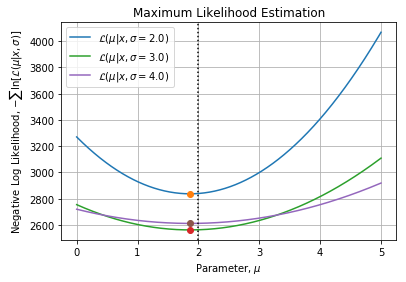

In [11]:
mu = np.linspace(0, 5, 1000)
fig, axe = plt.subplots()
for bmu in bmus:
    fnLL = nLL(bmu, xs)
    sol = optimize.minimize(fnLL, [0], method='Nelder-Mead')
    print(bmu, sol.x)
    axe.plot(mu, fnLL(mu), label=r"$\mathcal{L}\left(\mu|x,\sigma=%.1f\right)$" % bmu[1])
    axe.plot(sol.x, fnLL(sol.x), 'o')
axe.axvline(2, linestyle=':', color='k')
axe.set_title("Maximum Likelihood Estimation")
axe.set_xlabel("Parameter, $\mu$")
axe.set_ylabel(r"Negative Log Likelihood, $-\sum\ln[\mathcal{L}\left(\mu|x,\sigma\right)]$")
axe.legend()
axe.grid()
fig.savefig("MLE_NLL_Mean.png", dpi=120)

In [12]:
bsigmas = [[0,np.nan], [2,np.nan], [5,np.nan]]

[0, nan] [3.64248047]
[2, nan] [3.13369141]
[5, nan] [4.43271484]


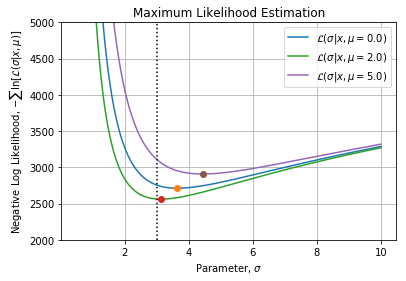

In [13]:
sigma = np.linspace(0.5, 10, 1000)
fig, axe = plt.subplots()
for bsigma in bsigmas:
    fnLL = nLL(bsigma, xs, index=1)
    sol = optimize.minimize(fnLL, [2], method='Nelder-Mead')
    print(bsigma, sol.x)
    axe.plot(sigma, fnLL(sigma), label=r"$\mathcal{L}\left(\sigma|x,\mu=%.1f\right)$" % bsigma[0])
    axe.plot(sol.x, fnLL(sol.x), 'o')
axe.axvline(3, linestyle=':', color='k')
axe.set_ylim([2000, 5000])
axe.set_title("Maximum Likelihood Estimation")
axe.set_xlabel("Parameter, $\sigma$")
axe.set_ylabel(r"Negative Log Likelihood, $-\sum\ln[\mathcal{L}\left(\sigma|x,\mu\right)]$")
axe.legend()
axe.grid()
fig.savefig("MLE_NLL_Sigma.png", dpi=120)

In [14]:
x0 = [1,2]

In [15]:
def nLL2(sample, law=stats.norm):
    def inner(beta):
        return -np.sum(law(*beta).logpdf(sample))
    return inner

In [16]:
path = []
def cb(x):
    path.append(x)

In [17]:
sol = optimize.minimize(nLL2(xs), x0, method='Nelder-Mead', callback=cb, options={'disp': True})

Optimization terminated successfully.
         Current function value: 2560.192674
         Iterations: 42
         Function evaluations: 83


In [18]:
npath = np.vstack((x0, np.array(path)))

In [19]:
fit = stats.norm.fit(xs)
fit

(1.8618672627061972, 3.130692231902425)

In [20]:
np.allclose(sol.x, fit, atol=1e-4)

True

In [21]:
np.allclose(fit, [xmu, xsigma])

True

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [23]:
@np.vectorize
def inner(x, y):
    return -np.sum(stats.norm(x, y).logpdf(xs))

In [24]:
bx = np.linspace(0, 5, 100)
by = np.linspace(1.5, 6.5, 100)
X, Y = np.meshgrid(bx, by)

In [25]:
Z = inner(X, Y)

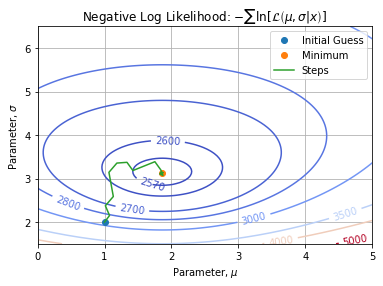

In [26]:
levels = [2570, 2600, 2700, 2800, 3000, 3500, 4000, 5000]
fig, axe = plt.subplots()
CS = axe.contour(X, Y, Z, levels, cmap=cm.coolwarm)
axe.plot(*x0, 'o', label="Initial Guess")
axe.plot(*fit, 'o', label="Minimum")
axe.plot(*npath.T, label="Steps")
axe.clabel(CS, inline=1, fontsize=10, fmt="%.0f")
axe.set_title(r"Negative Log Likelihood: $-\sum\ln[\mathcal{L}\left(\mu,\sigma|x\right)]$")
axe.set_xlabel(r"Parameter, $\mu$")
axe.set_ylabel(r"Parameter, $\sigma$")
axe.legend()
axe.grid()
fig.savefig("MLE_NLL_2D.png", dpi=120)

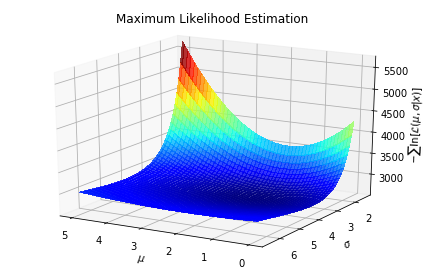

In [27]:
fig = plt.figure()
axe = fig.gca(projection='3d')
surf = axe.plot_surface(X, Y, Z, cmap=cm.jet, alpha=0.8, linewidth=0, antialiased=False)
#axe.contour(X, Y, Z, levels, zdir='z', offset=1000, cmap=cm.coolwarm)
#axe.contour(X, Y, Z, 5, zdir='x', offset=0, cmap=cm.coolwarm)
#axe.contour(X, Y, Z, 5, zdir='y', offset=0, cmap=cm.coolwarm)
#axe.plot(*npath.T, inner(*npath.T), color="white", linewidth=5)
axe.view_init(20, 120)
axe.set_title("Maximum Likelihood Estimation")
axe.set_xlabel(r"$\mu$")
axe.set_ylabel(r"$\sigma$")
axe.set_zlabel(r"$-\sum\ln[\mathcal{L}\left(\mu,\sigma|x\right)]$")
#fig.colorbar(surf, shrink=0.5, aspect=5)
#axe.set_zlim([2000, 6000])
fig.tight_layout()
fig.savefig("MLE_NLL_3D.png", dpi=120)